## Chi Square Scores and Feature Importance Scores

In [1]:
import pandas as pd
df = pd.read_csv('D:\\Feature Selection\\Datasets\\Mobile Datasets\\train.csv')

In [2]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Univariate Selection
# dependent and independent feature

X = df.iloc[:,:-1]
y = df['price_range']

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
df.shape

(2000, 21)

In [7]:
## Apply SelectKBest Algorithm

ordered_rank_features = SelectKBest(score_func = chi2,k = 20)
ordered_features = ordered_rank_features.fit(X,y)

In [8]:
ordered_features

SelectKBest(k=20, score_func=<function chi2 at 0x0000029A849CC0E0>)

In [10]:
ordered_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [12]:
pd.DataFrame(ordered_features.scores_,columns = ['Scores'])

,Scores
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [13]:
dfscores = pd.DataFrame(ordered_features.scores_,columns = ['Scores'])
dfcolumns = pd.DataFrame(X.columns)

In [14]:
feature_rank = pd.concat([dfcolumns,dfscores],axis = 1)

In [15]:
feature_rank

,0,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [17]:
feature_rank.columns = ['Features','Scores']

In [18]:
feature_rank

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [20]:
feature_rank.nlargest(10,'Scores')

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature Importances

This technique gives you a score for each feature of your data,The higher score relevent it is.

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [30]:
model.feature_importances_

array([0.06009204, 0.02020077, 0.03273073, 0.01976595, 0.03331654,
       0.01773746, 0.03591915, 0.03430839, 0.03675395, 0.03375344,
       0.03430659, 0.04756567, 0.0489814 , 0.38613999, 0.0343308 ,
       0.03476407, 0.03566918, 0.0141522 , 0.01875896, 0.02075269])

In [31]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)  # Use Column need to be Concatenate

In [32]:
ranked_features

battery_power    0.060092
blue             0.020201
clock_speed      0.032731
dual_sim         0.019766
fc               0.033317
four_g           0.017737
int_memory       0.035919
m_dep            0.034308
mobile_wt        0.036754
n_cores          0.033753
pc               0.034307
px_height        0.047566
px_width         0.048981
ram              0.386140
sc_h             0.034331
sc_w             0.034764
talk_time        0.035669
three_g          0.014152
touch_screen     0.018759
wifi             0.020753
dtype: float64

<Axes: >

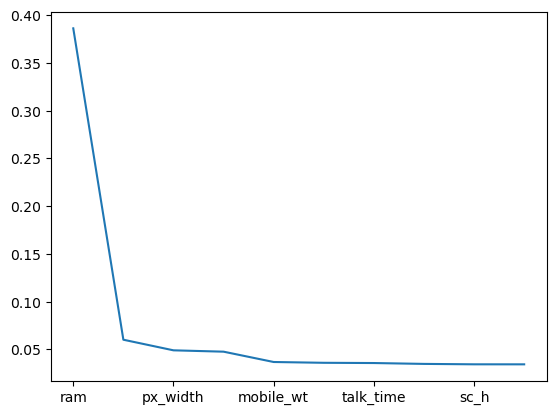

In [33]:
ranked_features.nlargest(10).plot()

<Axes: >

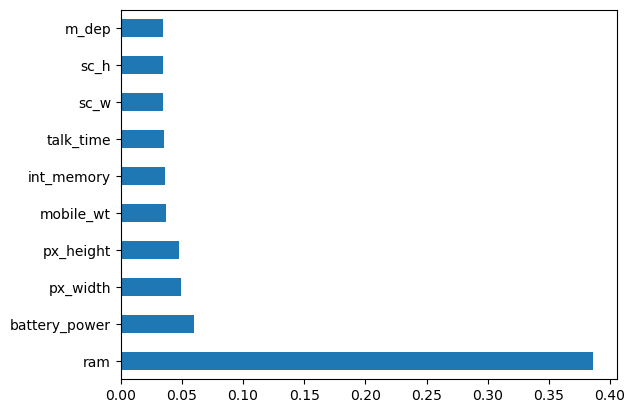

In [34]:
ranked_features.nlargest(10).plot(kind='barh')